In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv('suv.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.shape

(400, 5)

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
df.drop('User ID',inplace=True,axis=1)

In [14]:
s=df['Age']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [15]:
len(outliers)

0

In [16]:
s=df['EstimatedSalary']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [17]:
len(outliers1)

0

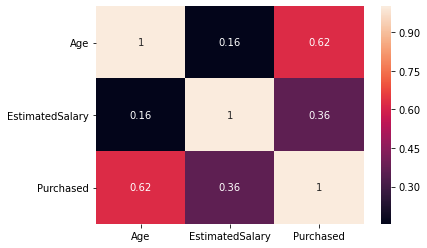

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
le=LabelEncoder()

In [20]:
df['Gender']=le.fit_transform(df['Gender'])

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [22]:
X=df.drop('Purchased',axis=1)
Y=df['Purchased']

In [23]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
ss=StandardScaler()

In [27]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [28]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(classification_report(Y_test,Y_pred))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.79      0.71      0.75        48

    accuracy                           0.81       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.81      0.81      0.81       120



In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier()

In [34]:
create_model(dt)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        72
           1       0.82      0.83      0.82        48

    accuracy                           0.86       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



In [35]:
from sklearn.svm import LinearSVC

In [36]:
svc1=LinearSVC(random_state=1)
svc2=LinearSVC(random_state=1,C=0.5)

In [37]:
create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        72
           1       0.81      0.71      0.76        48

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.80       120
weighted avg       0.82      0.82      0.81       120



In [38]:
create_model(svc2)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        72
           1       0.81      0.71      0.76        48

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.80       120
weighted avg       0.82      0.82      0.81       120



In [39]:
from sklearn.svm import SVC

In [40]:
svc3=SVC(kernel='rbf')
svc4=SVC(kernel='poly')

In [41]:
create_model(svc3)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        72
           1       0.80      0.92      0.85        48

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [42]:
create_model(svc4)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.80      0.69      0.74        48

    accuracy                           0.81       120
   macro avg       0.81      0.79      0.79       120
weighted avg       0.81      0.81      0.81       120



In [43]:
from sklearn.naive_bayes import BernoulliNB
be=BernoulliNB()

In [44]:
create_model(be)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        72
           1       0.65      0.50      0.56        48

    accuracy                           0.69       120
   macro avg       0.68      0.66      0.66       120
weighted avg       0.69      0.69      0.68       120



In [45]:
import math
math.sqrt(len(Y_test))

10.954451150103322

In [46]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=11)

In [47]:
create_model(cls)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        72
           1       0.81      0.92      0.86        48

    accuracy                           0.88       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
bc1=BaggingClassifier(LogisticRegression(),random_state=1)
bc2=BaggingClassifier(LogisticRegression(),random_state=1,bootstrap=False)

In [50]:
create_model(bc1)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        72
           1       0.81      0.71      0.76        48

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.80       120
weighted avg       0.82      0.82      0.81       120



In [51]:
create_model(bc2)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.79      0.71      0.75        48

    accuracy                           0.81       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.81      0.81      0.81       120



In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc=RandomForestClassifier(random_state=1)

In [54]:
create_model(rfc)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        72
           1       0.79      0.94      0.86        48

    accuracy                           0.88       120
   macro avg       0.87      0.89      0.87       120
weighted avg       0.89      0.88      0.88       120



In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgc=XGBClassifier()

In [57]:
create_model(ada)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88        72
           1       0.78      0.90      0.83        48

    accuracy                           0.86       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.87      0.86      0.86       120



In [58]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        72
           1       0.77      0.90      0.83        48

    accuracy                           0.85       120
   macro avg       0.84      0.86      0.85       120
weighted avg       0.86      0.85      0.85       120



In [59]:
create_model(xgc)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        72
           1       0.76      0.92      0.83        48

    accuracy                           0.85       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.86      0.85      0.85       120



In [60]:
from mlxtend.classifier import StackingClassifier

In [61]:
rfc=RandomForestClassifier(random_state=1)
xgc=XGBClassifier()
cls=KNeighborsClassifier(n_neighbors=11)
model_list=[rfc,xgc,cls]
meta=RandomForestClassifier(random_state=1)

In [62]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [63]:
create_model(sc)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.79      0.92      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120



In [64]:
from sklearn.ensemble import VotingClassifier

In [65]:
rfc=RandomForestClassifier(random_state=1)
xgc=XGBClassifier()
cls=KNeighborsClassifier(n_neighbors=11)
model_list=[("rfc",rfc),("xgc",xgc),("cls",cls)]

In [66]:
vc1=VotingClassifier(estimators=model_list)
vc2=VotingClassifier(estimators=model_list,voting="soft")

In [67]:
create_model(vc1)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        72
           1       0.78      0.94      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120



In [68]:
create_model(vc2)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        72
           1       0.78      0.94      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120

